Actually, considering that we have circular pupil, a out-of-focus point object will be seen as a donut. Convolving this "Point-Spread-Function" with the apparent shape of the satellite could give us a trail cross-section with a double peak structure.

Below we assume the apparent shape is a 2 x 2 m square.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from LEOSat import getSatSII

In [81]:
#satellite parameters
l1 = 2 #1.5 #meter
l2 = 2 #meter
h = 550e3

In [82]:
f=10.3
d=8.36
pixel_size = 10 #micron
plate_scale = 0.2
e = 0.61
seeing = 0.7
zangle = 40

In [83]:
[sii, fwhm_exp] = getSatSII(f,d,e, l1, l2, h, zangle, seeing, pixel_size, plate_scale)

donutR = 60 micron, satellite conv kernel = 28 x 28 microns
expected FWHM = 128 microns


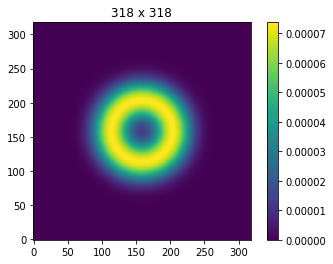

In [84]:
plt.imshow(sii, origin='lower left')
plt.colorbar()
[n1, n2] = sii.shape
plt.title('%d x %d'%(n1,n2));

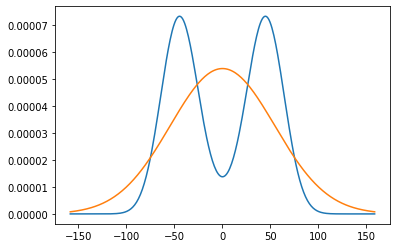

In [85]:
aa = sii[int(n1/2),:]
x1 = np.linspace(-(n1-1)/2, (n1-1)/2, n1)
x2 = np.linspace(-(n2-1)/2, (n2-1)/2, n2)
[x, y] = np.meshgrid(x2,x1)
r = np.sqrt(x**2+y**2)
pred = np.exp(-r**2/2/(fwhm_exp/2.355)**2)
pred = pred/np.sum(pred)
plt.plot(x2, aa)
plt.plot(x2, pred[int(n1/2),:]);

Text(0, 0.5, 'Normalized flux')

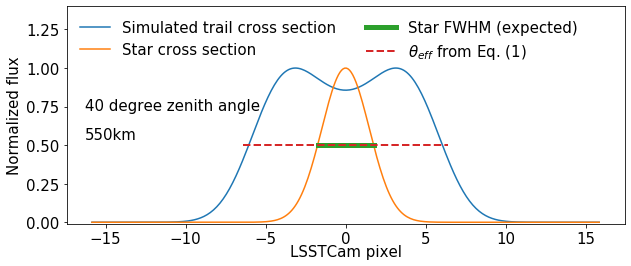

In [86]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
aa =np.sum(sii,axis=0)
plt.plot(x2/pixel_size, aa/np.max(aa),label='Simulated trail cross section');
#plt.plot(x2/pixel_size, np.sum(sii,axis=0),label='2m');
#plt.plot(x1/pixel_size, np.sum(sii,axis=1), label='1.5m'); #uncomment this if the apparent shape of LEOSat is not square, i.e, 1.5x2m
#plt.plot(x2/pixel_size, np.sum(pred,axis=0),label='pred');
#plt.plot([-fwhm_exp/pixel_size/2, fwhm_exp/pixel_size/2],[max(np.sum(pred,axis=0))/2, max(np.sum(pred,axis=0))/2])
s = np.exp(-x2**2/2/(seeing/plate_scale*pixel_size/2.355)**2)
plt.plot(x2/pixel_size,s, label = 'Star cross section')
plt.plot([-seeing/plate_scale/2, seeing/plate_scale/2],[0.5, 0.5], '-', linewidth = 5, label='Star FWHM (expected)')
plt.plot([-fwhm_exp/pixel_size/2, fwhm_exp/pixel_size/2],[0.5, 0.5],'--', linewidth = 2, label=r'$\theta_{eff}$ from Eq. (1)')
plt.text(0.15, 0.52, "40 degree zenith angle", color = 'black', transform=fig.transFigure, fontsize=15)
plt.text(0.15, 0.42, "550km", color = 'black', transform=fig.transFigure, fontsize=15)
plt.legend(fontsize=15, loc='upper left', framealpha=0., ncol = 2)
#plt.legend(fontsize=15, bbox_to_anchor=(0., 0.5, 0.5, 0.3), framealpha=0.)
#plt.grid()
plt.ylim([-0.01, 1.4])
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.xlabel('LSSTCam pixel', labelpad=-2, fontsize=15)
plt.ylabel('Normalized flux', fontsize=15)
#plt.savefig('sat_profile.pdf')

In [94]:
print('%.2f, %.2f, %.2f'%(seeing, fwhm_exp/pixel_size*plate_scale, fwhm_exp/pixel_size*plate_scale/np.cos(np.radians(40))))

0.70, 2.57, 3.35


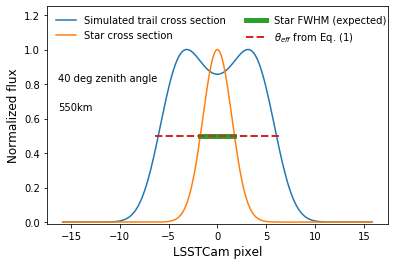

In [70]:
fig, ax = plt.subplots(figsize=(6.1,4))
aa =np.sum(sii,axis=0)
plt.plot(x2/pixel_size, aa/np.max(aa),label='Simulated trail cross section');
#plt.plot(x2/pixel_size, np.sum(sii,axis=0),label='2m');
#plt.plot(x1/pixel_size, np.sum(sii,axis=1), label='1.5m'); #uncomment this if the apparent shape of LEOSat is not square, i.e, 1.5x2m
#plt.plot(x2/pixel_size, np.sum(pred,axis=0),label='pred');
#plt.plot([-fwhm_exp/pixel_size/2, fwhm_exp/pixel_size/2],[max(np.sum(pred,axis=0))/2, max(np.sum(pred,axis=0))/2])
s = np.exp(-x2**2/2/(seeing/plate_scale*pixel_size/2.355)**2)
plt.plot(x2/pixel_size,s, label = 'Star cross section')
plt.plot([-seeing/plate_scale/2, seeing/plate_scale/2],[0.5, 0.5], '-', linewidth = 5, label='Star FWHM (expected)')
plt.plot([-fwhm_exp/pixel_size/2, fwhm_exp/pixel_size/2],[0.5, 0.5],'--', linewidth = 2, label=r'$\theta_{eff}$ from Eq. (1)')
plt.text(0.15, 0.62, "40 deg zenith angle", color = 'black', transform=fig.transFigure)
plt.text(0.15, 0.52, "550km", color = 'black', transform=fig.transFigure)
plt.legend(loc='upper left', framealpha=0., ncol = 2)
#plt.legend(fontsize=15, bbox_to_anchor=(0., 0.5, 0.5, 0.3), framealpha=0.)
#plt.grid()
plt.ylim([-0.01, 1.25])
plt.xlabel('LSSTCam pixel', fontsize=12)
plt.ylabel('Normalized flux', fontsize=12)
plt.savefig('sat_profile.pdf')

In [71]:
aa = np.sum(sii,axis=0)
idx = np.argmax(aa==max(aa))
print('peak pixel flux/total flux = %.4f'%sum(aa[idx-4:idx+6]))
aa = np.sum(pred,axis=0)
idx = np.argmax(aa==max(aa))
print('peak pixel flux/total flux (Gaussian Prediction) = %.4f'%sum(aa[idx-4:idx+6]))

peak pixel flux/total flux = 0.0841
peak pixel flux/total flux (Gaussian Prediction) = 0.0734


donutR = 33 micron, satellite conv kernel = 32 x 32 microns
expected FWHM = 104 microns


Text(0.5, 1.0, '428 x 428')

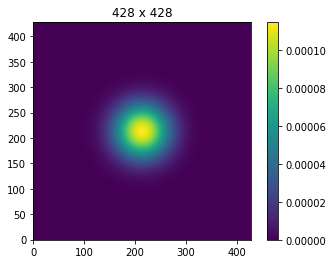

In [72]:
f=11.72
d=4.01
pixel_size = 15 #micron
plate_scale = 0.2637
e = 0.3396
seeing = 1.3
zangle = 40
[sii, fwhm_exp] = getSatSII(f,d,e, l1, l2, h, zangle, seeing, pixel_size, plate_scale)
plt.imshow(sii, origin='lower left')
plt.colorbar()
[n1, n2] = sii.shape
plt.title('%d x %d'%(n1,n2))

In [73]:
x1 = np.linspace(-(n1-1)/2, (n1-1)/2, n1)
x2 = np.linspace(-(n2-1)/2, (n2-1)/2, n2)
[x, y] = np.meshgrid(x2,x1)
r = np.sqrt(x**2+y**2)
pred = np.exp(-r**2/2/(fwhm_exp/2.355)**2)
pred = pred/np.sum(pred)

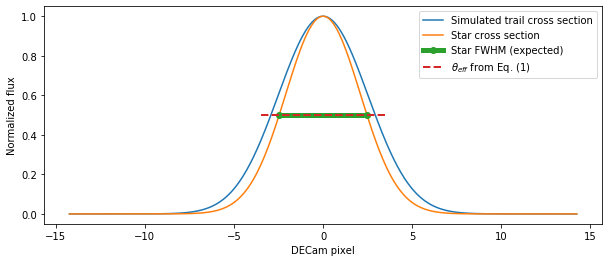

In [76]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
aa =np.sum(sii,axis=0)
plt.plot(x2/pixel_size, aa/np.max(aa),label='Simulated trail cross section');
#plt.plot(x2/pixel_size, np.sum(sii,axis=0),label='2m');
#plt.plot(x1/pixel_size, np.sum(sii,axis=1), label='1.5m'); #uncomment this if the apparent shape of LEOSat is not square, i.e, 1.5x2m
#plt.plot(x2/pixel_size, np.sum(pred,axis=0),label='pred');
#plt.plot([-fwhm_exp/pixel_size/2, fwhm_exp/pixel_size/2],[max(np.sum(pred,axis=0))/2, max(np.sum(pred,axis=0))/2])
s = np.exp(-x2**2/2/(seeing/plate_scale*pixel_size/2.355)**2)
plt.plot(x2/pixel_size,s, label = 'Star cross section')
plt.plot([-seeing/plate_scale/2, seeing/plate_scale/2],[0.5, 0.5], '-o', linewidth = 5, label='Star FWHM (expected)')
plt.plot([-fwhm_exp/pixel_size/2, fwhm_exp/pixel_size/2],[0.5, 0.5],'--', linewidth = 2, label=r'$\theta_{eff}$ from Eq. (1)')

plt.legend()
#plt.grid()
plt.ylabel('Normalized flux')
plt.xlabel('DECam pixel')
plt.savefig('sat_profile_DECam.pdf')

In [80]:
seeing

1.3

In [79]:
fwhm_exp/pixel_size*plate_scale

1.8295602461131042

In [35]:
cosz = np.cos(np.radians(40))
print(cosz)
print('expected DECam trail FWHM (zenith) = %.2f arcsec'%(    
    np.sqrt((4/550e3/np.pi*180*3600)**2+(2/550e3/np.pi*180*3600)**2+1.3**2) ) )
print('expected DECam trail FWHM (40 deg off zenith) = %.2f arcsec'%(
    np.sqrt((4/(550e3/cosz)/np.pi*180*3600)**2+(2/(550e3/cosz)/np.pi*180*3600)**2+1.3**2) ))

0.766044443118978
expected DECam trail FWHM (zenith) = 2.12 arcsec
expected DECam trail FWHM (40 deg off zenith) = 1.83 arcsec


In [19]:
size_eff = np.array([2.08, 1.76, 2.71, 2.24, 2.13]) #this has been airmass-corrected to zenith
airmass = np.array([1.03, 1.15, 1.55, 1.55, 1.71])
psf_fwhm = np.array([1.35, 1.35, 1.2, 1.18, 1.33])

In [24]:
#correct things back to where they were measured, irregardless of zenith angle
np.sqrt((size_eff/airmass)**2+psf_fwhm**2)

array([2.42910414, 2.04076717, 2.12057951, 1.86571465, 1.82221138])

These are consistent with 2.12 and 1.82 arcsec above

In [37]:
print('40 deg airmass = %.2f'%(1/cosz))

40 deg airmass = 1.31


In [38]:
np.sqrt((8.36/550e3/np.pi*180*3600)**2+(2/550e3/np.pi*180*3600)**2+0.7**2)

3.2988205330799136